# Introduction to Options

Options are financial derivatives that give buyers the right, but not the obligation, to buy or sell an underlying asset at a specified price, known as the strike price, before a certain expiration date. 

## Long and Short Positions

- **Long Position (Buying an Option):** The buyer of the option holds a long position. They have the right to exercise the option.
- **Short Position (Selling/Writing an Option):** The seller or writer of the option holds a short position. They have the obligation to fulfill the contract if the buyer exercises the option.

## Call and Put Options

- **Call Option:** Gives the holder the right to buy the underlying asset.
- **Put Option:** Gives the holder the right to sell the underlying asset.

## In the Money (ITM), At the Money (ATM), Out of the Money (OTM)

- **In the Money:** 
  - For a call option, when the underlying asset price is above the strike price.
  - For a put option, when the underlying asset price is below the strike price.
- **At the Money:** The underlying asset's price is equal to the strike price.
- **Out of the Money:**
  - For a call option, when the underlying asset price is below the strike price.
  - For a put option, when the underlying asset price is above the strike price.

## Expiration Date

- **Expiration Date:** The date on which the option expires. If the option is not exercised by this date, it becomes worthless.

## Premium

- **Premium:** The price paid by the buyer to the seller to acquire the rights that the option grants.

## Profit Equations for Options

The profit for options can be calculated as follows:

- **Call Option Profit:**
  $$\text{Profit} = \max(S - K, 0) - \text{Premium}$$
  Where \(S\) is the spot price of the underlying asset and \(K\) is the strike price.

- **Put Option Profit:**
  $$\text{Profit} = \max(K - S, 0) - \text{Premium}$$
  Where \(S\) is the spot price of the underlying asset and \(K\) is the strike price.



## Scenario 1:
An investor buys an at-the-money put option for Apple Inc. (AAPL), currently trading at $150. The call option costs a premium of $10. The option expires in three months.

### Details:
- **Underlying Asset Price (S)**: $150
- **Strike Price (K)**: $150
- **Premium Paid**: $10

### Profit Calculation:
At expiration, AAPL is trading at $165. The option is not worth exercising since the market price is above the strike price.

- **Intrinsic Value**: max(K - S, 0) = max(150 - 165, 0) = 0
- **Profit**: Intrinsic Value - Premium = $0 - $10 = -$10

The investor incurs a loss equal to the premium of $10.


## Scenario 2:
A daring trader, inspired by Dr. Ludwig talking about yachts, buys a far out-of-the-money call option on GameStop (GME), currently trading at $40. The call option has a strike price of $100, costs a premium of $0.10, and expires in two weeks. The trader spends $2000 to buy 20,000 of these call options.

### Details:
- **Underlying Asset Price (S)**: $40
- **Strike Price (K)**: $100
- **Premium Paid**: $0.10

### Profit Calculation:
Miraculously, following a tweet from a famous billionaire about loving video games, GME skyrockets to $125 at expiration.

- **Intrinsic Value**: max(S - K, 0) = max(125 - 100, 0) = $25
- **Profit**: Intrinsic Value - Premium = $25 - $0.10 = $24.90

So the trader in total recieves $24.90*20,000=$498,000 in profit.




## Problem 1



In the context of options trading, a portfolio can be constructed using various combinations of call and put options. The profit or loss of these portfolios is evaluated at expiration time \( t = T \). Below, we discuss several types of option portfolios, their profit calculations, and the market expectations that might lead an investor to adopt each strategy.

Let $ C_E $ denote a call option with strike price $ E $, and $ P_E $ denote a put option with the same strike price. A negative sign (e.g., $ -C_E $) indicates a short position in the option.



1. **Long Call**: $\text{Port} = C_E $

2. **Short Call**: $ \text{Port} = -C_E $
 
3. **Long Put**: $ \text{Port} = P_E $
   
4. **Short Put**: $ \text{Port} = -P_E $
  
5. **Long Straddle**: $ \text{Port} = P_E + C_E $
  
6. **Short Straddle**: $ \text{Port} = -P_E - C_E $
   
7. **Long Strangle**: $ \text{Port} = P_{E1} + C_{E2} $
  
8. **Short Butterfly**: $ \text{Port} = -C_{E1} + 2C_{E2} - C_{E3} $
  
9. **Long Butterfly**: $ \text{Port} = C_{E1} - 2C_{E2} + C_{E3} $
   
10. **Short Condor**: $ \text{Port} = -C_{E1} + C_{E2} + C_{E3} - C_{E4} $

11. **Long Condor**: $ \text{Port} = C_{E1} - C_{E2} - C_{E3} + C_{E4} $




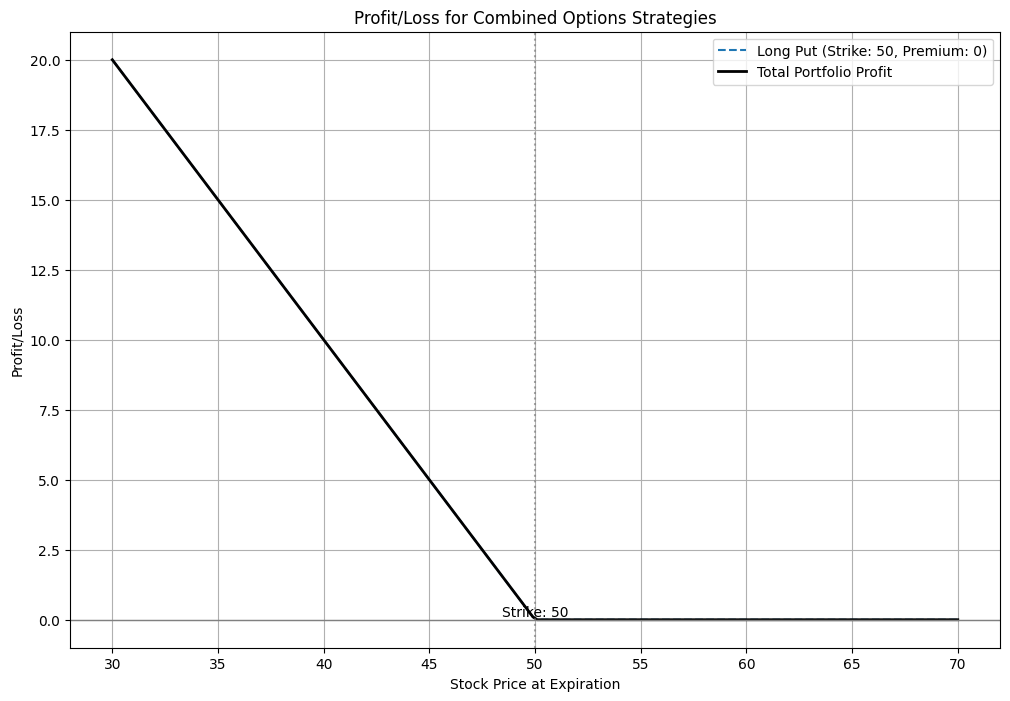

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_option_payoff(strategy, strike, premium, stock_prices):
    """
    Calculate the payoff for a single option based on the strategy.
    """
    if strategy == "long_call":
        payoff = np.maximum(stock_prices - strike, 0) - premium
    elif strategy == "short_call":
        payoff = -np.maximum(stock_prices - strike, 0) + premium
    elif strategy == "long_put":
        payoff = np.maximum(strike - stock_prices, 0) - premium
    elif strategy == "short_put":
        payoff = -np.maximum(strike - stock_prices, 0) + premium
    else:
        raise ValueError("Invalid strategy")
    return payoff

def plot_options_strategies(strategies, stock_price_range):
    """
    Plot the profit/loss for a combination of option strategies.
    """
   
    stock_prices = np.linspace(stock_price_range[0], stock_price_range[1], 200)
    total_payoff = np.zeros_like(stock_prices)
    plt.figure(figsize=(12, 8))

    # Plotting each strategy's payoff separately
    for i, strategy in enumerate(strategies):
        payoff = calculate_option_payoff(strategy['type'], strategy['strike'], strategy['premium'], stock_prices)
        total_payoff += payoff
        plt.plot(stock_prices, payoff, label=f"{strategy['type'].replace('_', ' ').title()} (Strike: {strategy['strike']}, Premium: {strategy['premium']})", linestyle='--')

    # Plotting the total portfolio payoff
    plt.plot(stock_prices, total_payoff, label="Total Portfolio Profit", color='black', linewidth=2)

    # Adding annotations for strike prices and break-even points
    for strategy in strategies:
        plt.axvline(x=strategy['strike'], color='grey', linestyle=':', alpha=0.7)
        plt.text(strategy['strike'], 0, f"Strike: {strategy['strike']}", horizontalalignment='center', verticalalignment='bottom')

    # Setting up the graph with labels, legends, and grid
    plt.axhline(0, color='gray', lw=1)
    plt.xlabel("Stock Price at Expiration")
    plt.ylabel("Profit/Loss")
    plt.title("Profit/Loss for Combined Options Strategies")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
strategies = [
    {"type": "long_put", "strike": 50, "premium": 0},
   
    
]

plot_options_strategies(strategies, (30, 70))

## Problem 2

This is another question about portfolios. Here, for a given shape of the profit
curve, design the portfolio.

(a) Construct a portfolio using only Calls where, at time t = T , the profit line
is horizontal until price $60. At that point, it has slope 3 until price $70.
Then, the line has slope 2 until price $100. Next, it has slope zero until
price $110. It then has a slope of −1 until $120. After that, it has slope
zero.

(b) Construct a portfolio with the above behavior but using only Puts.

(c) Construct a portfolio with the above behavior using both Puts and Calls

## Put-Call Parity Equation

The put-call parity  principle in options pricing that explains the relationship between the price of call and put options with the same strike price and expiration date. 

The put-call parity equation is given by:

$$ S + P_E(S, t) = C_E(S, t) + Ee^{-r(T-t)} $$

where:

- $ S $ is the current price of the stock (spot price).
- $ P_E(S, t) $ is the price of the put option with strike price $E $ and time $ t $ until expiration.
- $C_E(S, t) $ is the price of the call option with the same strike price and time to expiration as the put.
- $E$ is the strike price of the options.
- $ e^{-r(T-t)}$ is the present value factor for a risk-free bond that pays $ E $ at time $T $, with $ r$ being the continuously compounded risk-free interest rate and $ T-t $ being the time to maturity of the options.

The put-call parity shows that the price of a call option implies a certain fair price for the corresponding put option having the same strike price and expiration, and vice versa, given the current stock price and the risk-free rate. 


## Problem 3


Two days before expiration date, Patty wants to sell a Call with strike price $100; i.e., she wants to go short on $C_{100,t}$. The interest rate is $r = 10\%$, and the current value of the stock is $120. Use the Put–Call Parity Equation to find a lower bound on the value of $C_{100,t}$.




In [ ]:
import numpy as np

# Given values
S = 120  # Current stock price
K = 100  # Strike price
r = 0.10  # Interest rate
T_minus_t = 2/365  # Time to expiration in years (2 days)

# Put-Call Parity: C = S - P + (K * e^(-r(T-t)))
# Since we need to find a lower bound for C, we can omit the put price assuming P >= 0
# Therefore, C >= S - (K * e^(-r(T-t)))

# Calculate the exponential term
discount_factor = np.exp(-r * T_minus_t)

# Calculate the lower bound for the call option price
C_lower_bound = S - (K * discount_factor)

print(f" The lower bound on the value of the call option is ${C_lower_bound:.2f}")

## Problem 4
Igor read in the press this morning that, for an expiration date of a year from now (with 5% interest) that $C_{60}(70, t) = 9$ and $P_{60}(70, t) = 4$. How can he use this information to make some money?

In [43]:
# Given values
C = 9  # Price of the call option
P = 4  # Price of the put option
E = 60  # Strike price
S = 70  # Current stock price
r = 0.05  # Interest rate
T = 1  # Time to expiration in years

# Calculate the present value of the strike price
E_discounted = E * np.exp(-r * T)

# Calculate the left-hand side (LHS) and right-hand side (RHS) of the equation
LHS = C + E_discounted
RHS = P + S

# Determine if there is an arbitrage opportunity and suggest strategy
if LHS > RHS:
    # LHS is overpriced, sell the call, buy the put, and invest the strike price at risk-free rate
    arbitrage_amount = LHS - RHS
    strategy = f"Sell the call option for ${C:.2f}, buy the put option for ${P:.2f}, take out a loan of ${E_discounted:.2f}, buy the stock at ${S:.2f} "
elif LHS < RHS:
    # RHS is overpriced, buy the call, sell the put, and borrow the strike price at risk-free rate
    arbitrage_amount = RHS - LHS
    strategy = f"Buy the call option for ${C:.2f}, sell the put option for ${P:.2f}, sell (short) the stock at ${S:.2f}, invest ${E_discounted:.2f} in the risk free asset."
else:
    # No arbitrage opportunity exists
    arbitrage_amount = 0
    strategy = "No arbitrage opportunity is available."

print(f"Arbitrage opportunity of ${arbitrage_amount:.2f} exists.")
print("Strategy:", strategy)


Arbitrage opportunity of $7.93 exists.
Strategy: Buy the call option for $9.00, sell the put option for $4.00, sell (short) the stock at $70.00, invest $57.07 in the risk free asset.


## Problem 5
 For S = 105, r = 0.05, compute the following:

(a) Find the value of $P_{100}(105, T − 1) − C_{100}(105, T − 1)$ if T − t = 1 year.

(b) Find the value of $P_{105}(105, T − 1) − C_{105}(105, T − 1)$ if T − t = 1 year.

(c) Find the value of $P_{115}(105, T − 1) − C_{115}(105, T − 1)$ if T − t = 1 year.

(d) Find the value of $P_{100}(105, T −2)−C_{100}(105, T −2)$ if T −t = 2 years.

(e) Find the value of $P_{100}(105, T − 1) − C_{100}(105, T − 1)$ if T − t = 1 year
and r = 0.10.

In [30]:
def put_call_parity_difference(S, K, r, T_minus_t):
    """
    Compute the difference P_K(S, T - t) - C_K(S, T - t) using the Put-Call Parity relation.
    
    Args:
    S (float): Current stock price.
    K (float): Strike price of the option.
    r (float): Risk-free interest rate (as a decimal).
    T_minus_t (float): Time to expiration in years.
    
    
    Returns:
    float: The difference between the put and call options' prices.
    """
    # Calculate the present value of the strike price
    K_discounted = K * np.exp(-r * T_minus_t)
    
    difference = K_discounted - S
    return difference


# (a) For K = 100 and T - t = 1 year
difference_a = put_call_parity_difference(S=105, K=100, r=.05, T_minus_t=1)

# (b) For K = 105 and T - t = 1 year
difference_b = put_call_parity_difference(S=105, K=105, r=.05, T_minus_t=1)

# (c) For K = 115 and T - t = 1 year
difference_c = put_call_parity_difference(S=105, K=115, r=.05, T_minus_t=1)

# (d) For K = 100 and T - t = 2 years
difference_d = put_call_parity_difference(S=105, K=100, r=.05, T_minus_t=2)

# (e) For K = 100, T - t = 1 year and r = 0.10
difference_e = put_call_parity_difference(S=105, K=100, r=.1, T_minus_t=1)

(difference_a, difference_b, difference_c, difference_d, difference_e)


(-9.877057549928594,
 -5.120910427425031,
 4.39138381758211,
 -14.516258196404053,
 -14.516258196404053)